In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire

In [3]:
# Step 1: Load the data
df=pd.read_csv('/Algerian_forest_fires_cleaned_new.csv')

In [4]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [5]:
# Step 3: Feature engineering/preprocessing
df.drop(['day', 'month', 'year'], axis=1, inplace=True)

In [6]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [7]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [8]:
df['Region'].value_counts()

Region
0    122
1    121
Name: count, dtype: int64

In [9]:
# Step 2: cleaning the data
df['Classes']=np.where(df['Classes'].str.contains("not fire"),0,1)

In [10]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [11]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [12]:
# step 4 Data Exploration/Visualizations
# Univariate, BiVariate & Multi Variate

<ipython-input-13-35fdfd3fbcdd>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


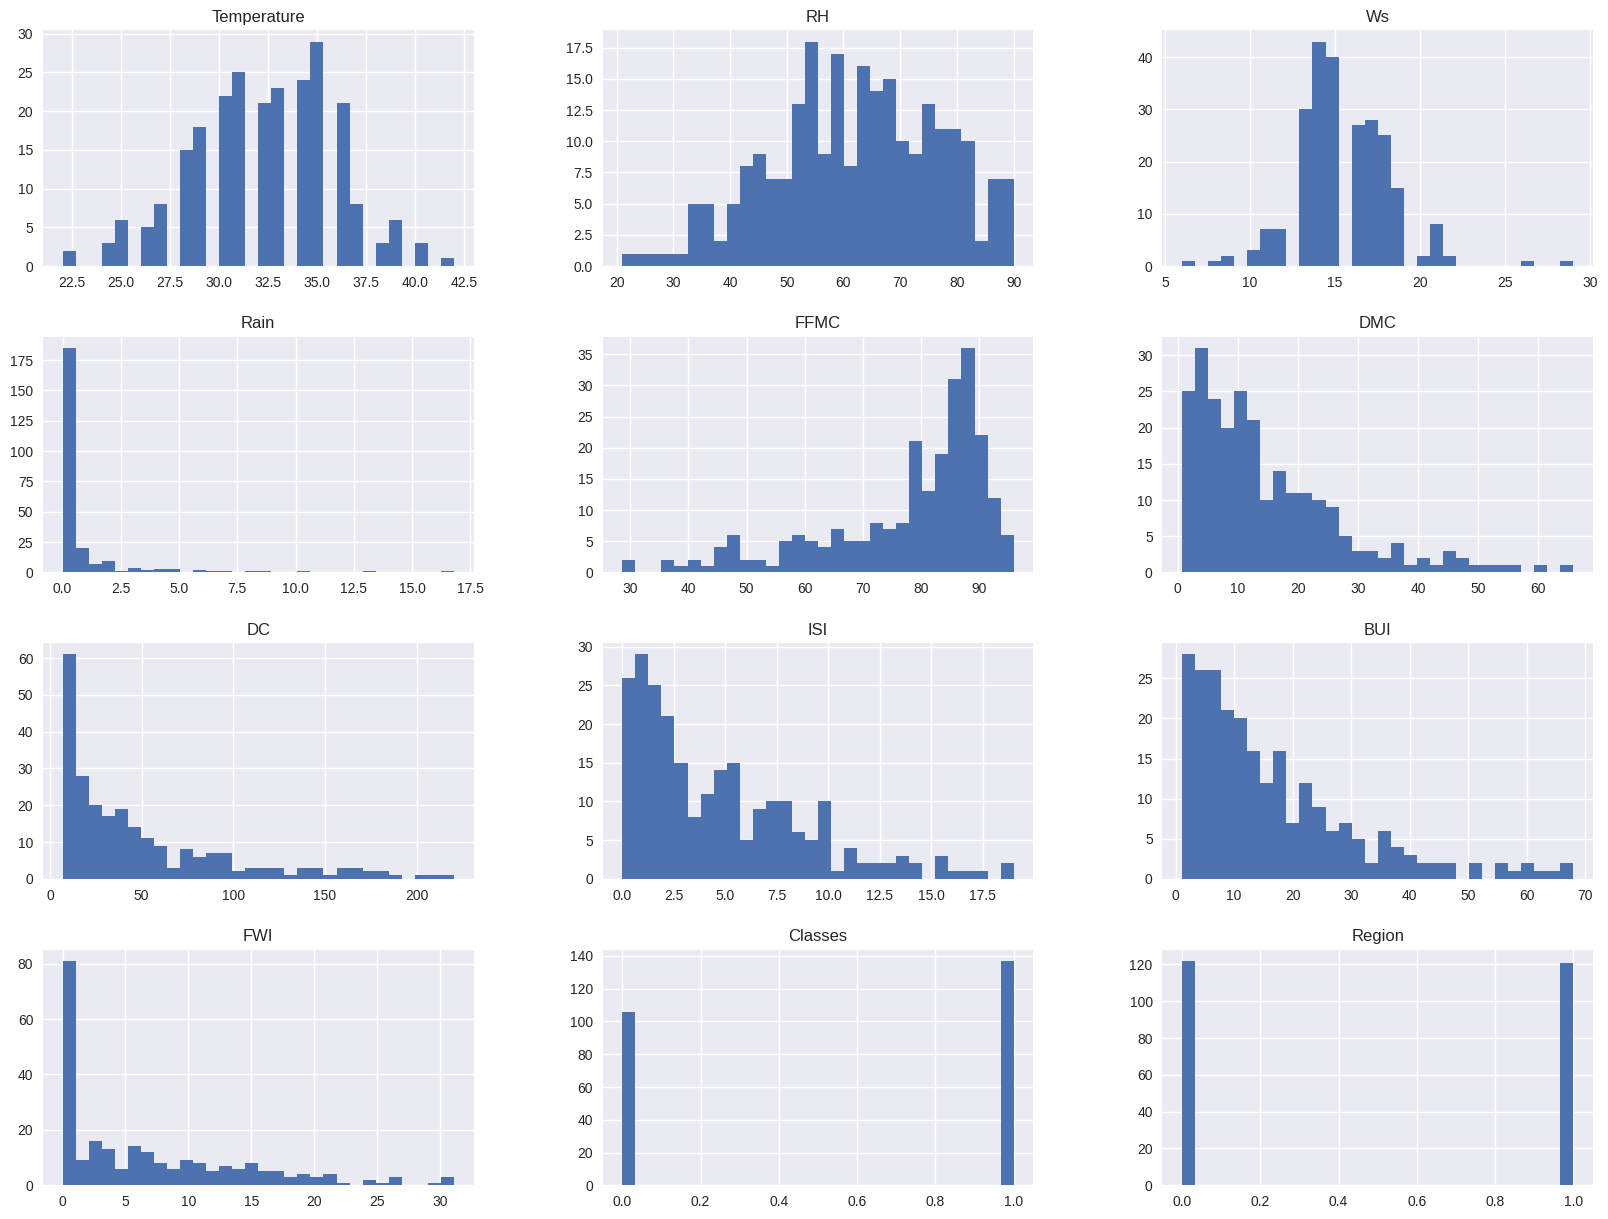

In [13]:
# Univariate Analysis
plt.style.use('seaborn')
df.hist(bins=30, figsize=(20,15))
plt.show()

<Axes: >

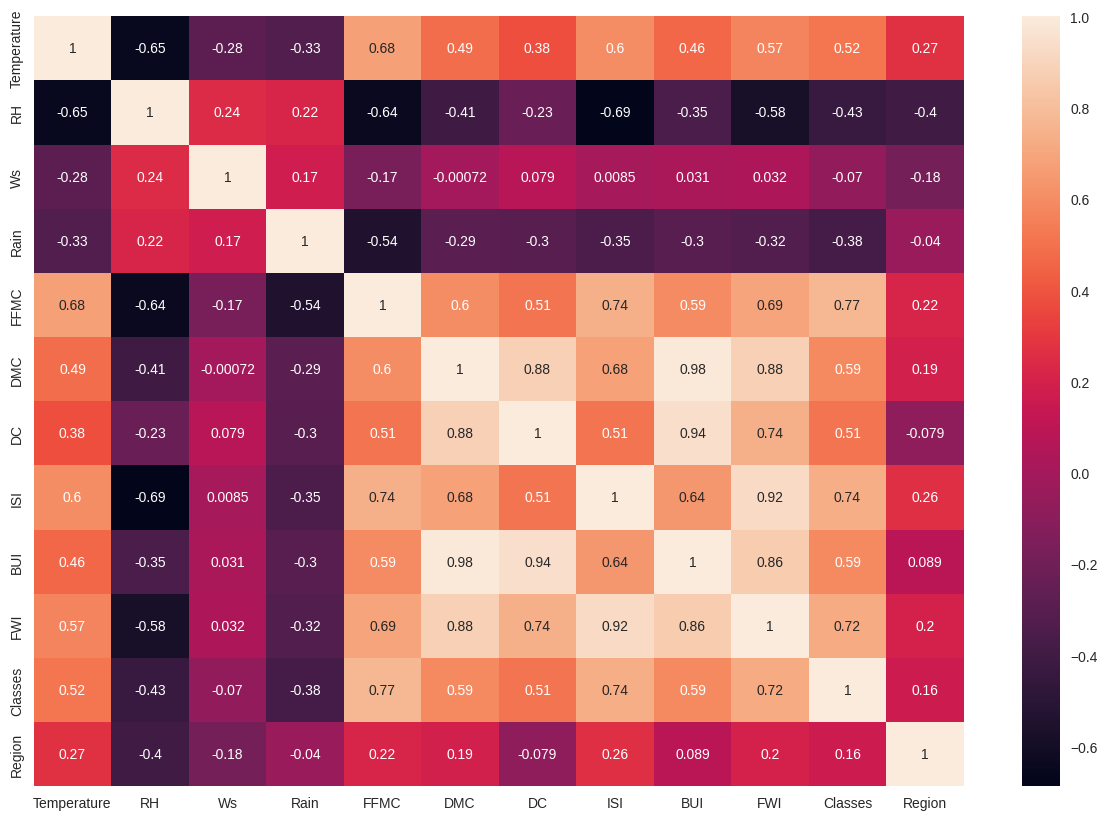

In [14]:
plt.figure (figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

In [15]:
# Feature Engineering
# Multi COllinearity (All IV should be independent to each other)

In [16]:
# Going to drop 'DC' & 'BUI' from df because of multicollinearity with 'DMC'
df.drop(['DC', 'BUI'], axis=1, inplace=True)

In [17]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,1.3,0.5,0,0
1,29,61,13,1.3,64.4,4.1,1.0,0.4,0,0
2,26,82,22,13.1,47.1,2.5,0.3,0.1,0,0
3,25,89,13,2.5,28.6,1.3,0.0,0.0,0,0
4,27,77,16,0.0,64.8,3.0,1.2,0.5,0,0


In [18]:
# Step 6 Split IV and DV from dataset.

In [19]:
y=df['FWI']

In [20]:
X=df.drop(['FWI'], axis=1,)

In [21]:
X.shape, y.shape

((243, 9), (243,))

In [22]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
0,29,57,18,0.0,65.7,3.4,1.3,0,0
1,29,61,13,1.3,64.4,4.1,1.0,0,0
2,26,82,22,13.1,47.1,2.5,0.3,0,0
3,25,89,13,2.5,28.6,1.3,0.0,0,0
4,27,77,16,0.0,64.8,3.0,1.2,0,0


In [23]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
# step 7 split the data into two parts Train & test
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.20, random_state=42)

In [26]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((194, 9), (49, 9), (194,), (49,))

In [27]:
# step 8 Scaling the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train_sc=scaler.fit_transform(X_train)
X_test_sc=scaler.transform(X_test)


In [28]:
  X_train

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
115,29,65,19,0.6,68.3,5.5,1.5,0,0
207,33,37,16,0.0,92.2,61.3,13.1,1,1
158,38,43,13,0.5,85.0,13.0,4.1,1,1
132,31,42,21,0.0,90.6,18.2,13.4,1,1
84,34,64,14,0.0,88.9,40.5,9.0,1,0
...,...,...,...,...,...,...,...,...,...
106,24,82,15,0.4,44.9,0.9,0.2,0,0
14,28,80,17,3.1,49.4,3.0,0.4,0,0
92,25,76,17,7.2,46.0,1.3,0.2,0,0
179,34,59,16,0.0,88.1,19.5,7.4,1,1


In [29]:
X_train_sc

array([[-0.87563202,  0.21321832,  1.28577038, ..., -0.79648833,
        -1.14434427, -1.01036297],
       [ 0.22209084, -1.65484925,  0.14504117, ...,  1.88757476,
         0.8738629 ,  0.98974332],
       [ 1.5942444 , -1.25454906, -0.99568804, ..., -0.19488798,
         0.8738629 ,  0.98974332],
       ...,
       [-1.97335488,  0.947102  ,  0.52528424, ..., -1.0972885 ,
        -1.14434427, -1.01036297],
       [ 0.49652155, -0.18708188,  0.14504117, ...,  0.56868169,
         0.8738629 ,  0.98974332],
       [-0.60120131,  1.0138187 ,  2.04625653, ..., -0.88904223,
        -1.14434427, -1.01036297]])

<ipython-input-30-ba6da2e13605>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


Text(0.5, 1.0, 'X_train After Scaling')

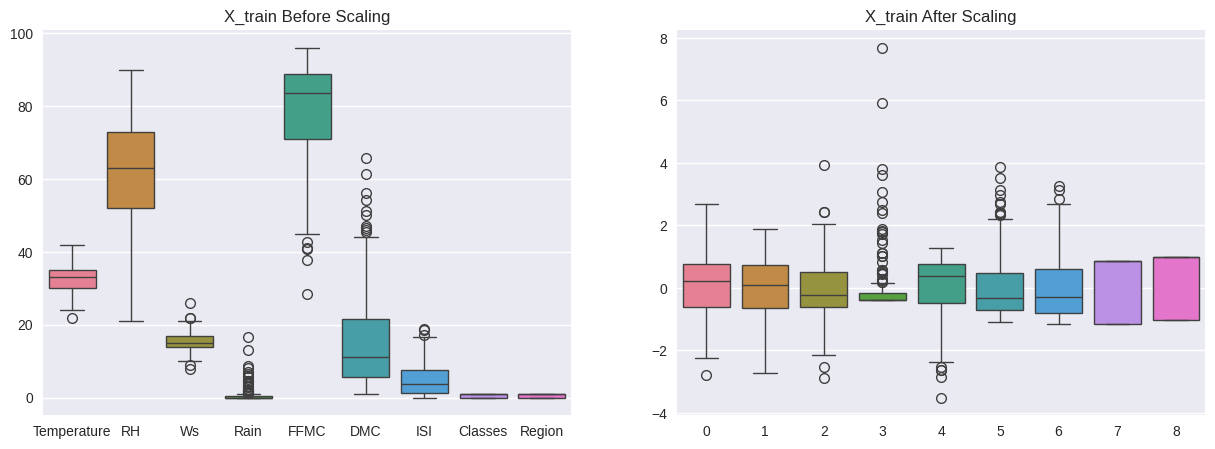

In [30]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_sc)
plt.title('X_train After Scaling')

In [31]:
# step 9 is called Model Training
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [32]:
lin_reg=LinearRegression()

In [33]:
# Train my model with scaled training data
lin_reg.fit(X_train_sc, y_train)

LinearRegression()

In [34]:
lin_reg.coef_

array([-0.02653611, -0.1808412 , -0.01415259, -0.0330928 , -0.82478219,
        3.80917655,  4.89287492,  0.39085739, -0.4004259 ])

In [35]:
lin_reg.intercept_

7.420103092783505

Mean absolute error 0.5049978694165687
R2 Score 0.9805895859259882


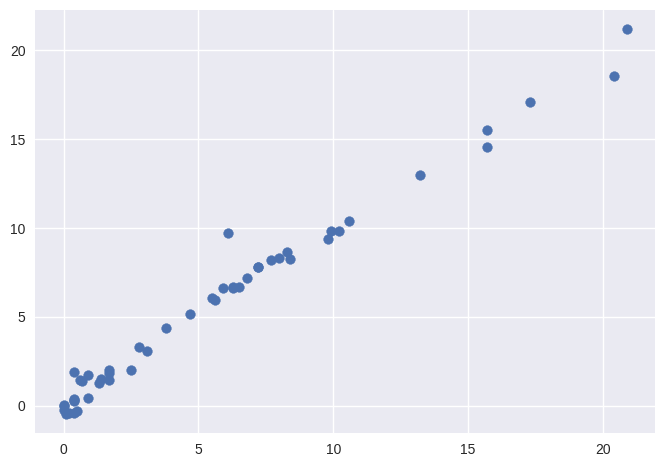

In [36]:
# 1. Linear_Reg
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(X_train_sc,y_train)
y_pred=linreg.predict(X_test_sc)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

Mean absolute error 1.0093958923873407
R2 Score 0.9430507350726562


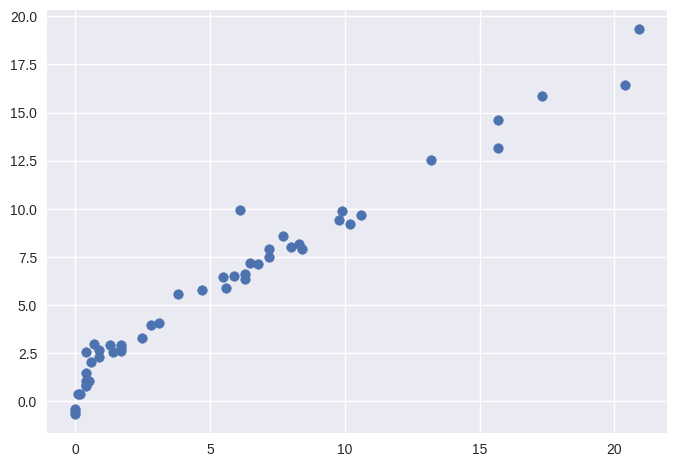

In [37]:
# 2. lasso Regression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train_sc,y_train)
y_pred=lasso.predict(X_test_sc)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

Mean absolute error 0.5556715031617876
R2 Score 0.9783282345203429


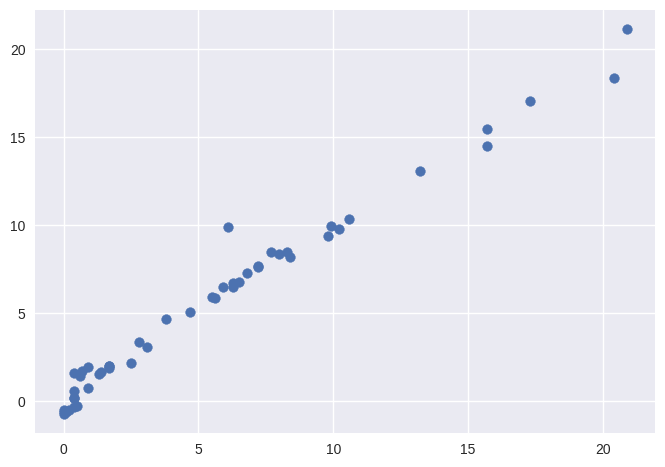

In [38]:
# 3 Lasso with CV
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_sc,y_train)
y_pred=lassocv.predict(X_test_sc)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 0.5192048325844797
R2 Score 0.9801058063273599


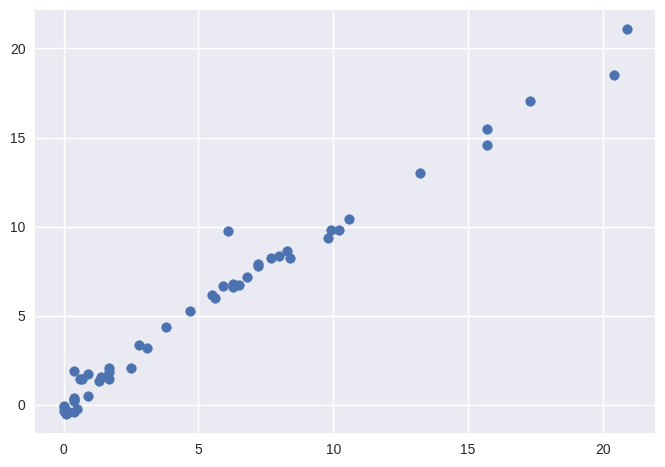

In [39]:
# 4 Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_sc,y_train)
y_pred=ridge.predict(X_test_sc)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

Mean absolute error 0.6869262008277153
R2 Score 0.9722193780965623


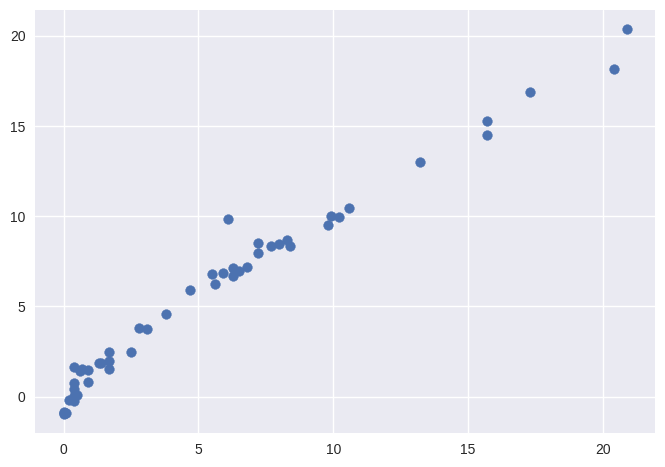

In [40]:
# 5 Ridge Regression with Cv
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_sc,y_train)
y_pred=ridgecv.predict(X_test_sc)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 1.6834416340136709
R2 Score 0.8676961352267807


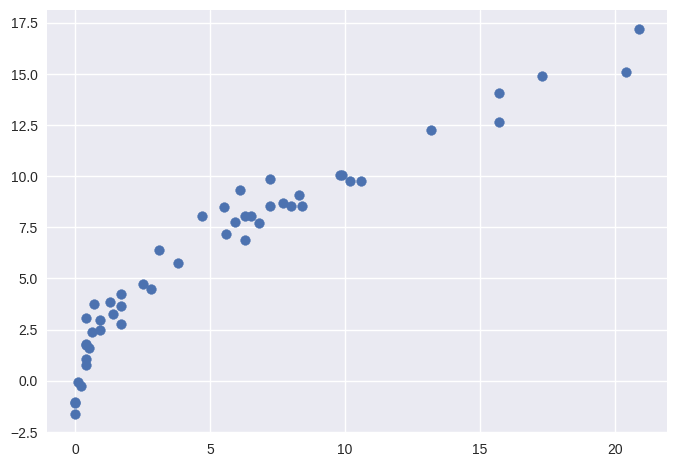

In [41]:
# 6 Elastic_net Regression
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNet()
elastic.fit(X_train_sc,y_train)
y_pred=elastic.predict(X_test_sc)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

Mean absolute error 1.6834416340136709
R2 Score 0.8676961352267807


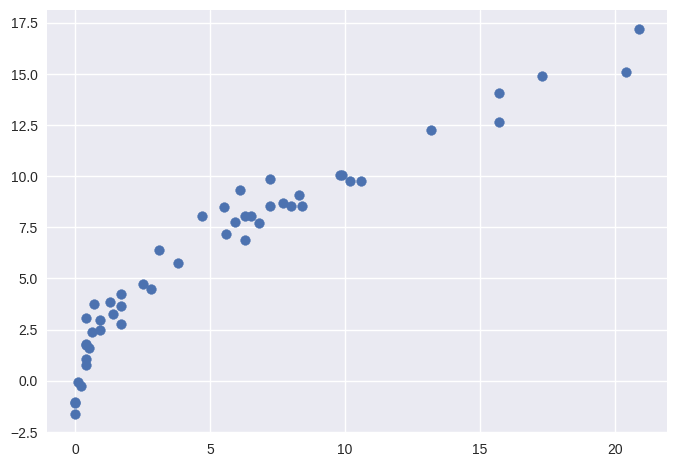

In [42]:
# 7 Elastic_net Regression with Cv
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elasticcv=ElasticNetCV(cv=5)
elasticcv.fit(X_train_sc,y_train)
y_pred=elastic.predict(X_test_sc)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

# Best Fit line Equation

Predicted_FWI= -0.026 * Temp - 0.18 * RH - 0.014 * Ws - 0.033 * Rain - 0.824 * FFMC + 3.81 * DMC + 4.89 * ISI + 0.39 * Classes - 0.40 * Region + 7.42

In [44]:
# step 11 To write the pickle files for the future IV prediction
import pickle
pickle.dump(scaler,open('scaler_bdm_project.pkl', 'wb'))
pickle.dump(ridge,open('ridge_bdm_project.pkl', 'wb'))

In [45]:
X.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,4.742387,0.563786,0.497942
std,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,4.154234,0.496938,0.501028
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,0.000000,0.000000,0.000000
25%,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,1.400000,0.000000,0.000000
50%,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,3.500000,1.000000,0.000000
75%,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,7.250000,1.000000,1.000000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,19.000000,1.000000,1.000000
